In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime

from valueinvesting import utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
evaluate_last_X_years = False
X=10
currency_pair = 'EUR=X'
numbers_in_currency = 'EUR'
share_name = 'BAYN.DE'

# 1.1 Calculate Share numbers from total distributed dividend (CFS) and dividend amount

# 1.2. Raw input statement data

In [3]:
route = f"../data/input/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

In [4]:
owned_shares = pd.read_csv('../data/extras/owned_stocks.csv', sep=';', parse_dates=['date'])
owned_shares = owned_shares.loc[(owned_shares['stock'] == share_name) & (owned_shares['active'] == 'yes')]

## (OPTIONAL) Time Filtering - Last 7 years daat

In [5]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,curr_assets,goodwill,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,shares
0,1999-09-30,6057,-3229,2828,434,3438,6891,4782,15111,0,...,30158,0,0,0,6627,0,15470,2341,0,733.0
1,1999-12-31,6498,-3554,2944,-134,3140,6909,4992,15041,0,...,31279,0,0,0,6808,0,16273,728,0,733.0
2,2000-03-31,6962,-3561,3401,560,1309,8491,5151,14951,0,...,33540,0,0,0,9036,0,18631,1035,0,733.0
3,2000-06-30,7537,-3992,3545,484,1091,8689,5439,15219,0,...,33850,0,0,0,8613,0,18694,1352,0,733.0
4,2000-09-30,7302,-3913,3389,541,1178,8662,5957,15797,0,...,35403,0,0,0,8568,0,19142,928,0,733.0


## Calculate date when quaterly reports could be available

In [6]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [7]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
93,2022-12-31,2023-02-11,982.42,12001,-4768,7232,609,5171,10312,13636,...,24183,124877,7545,0,7861,35084,33791,86104,3061,-1324
94,2023-03-31,2023-04-21,982.42,14389,-5733,8656,2182,4854,14559,13531,...,23352,125052,6268,0,9728,34391,33571,84188,-3550,-466
95,2023-06-30,2023-07-21,982.42,11044,-4718,6326,-1889,4481,13717,13768,...,23438,121667,5970,0,9960,32187,36557,84719,483,-606
96,2023-09-30,2023-10-21,982.42,10342,-4812,5530,-4577,6815,10532,13956,...,23169,117242,6500,0,12313,33081,35111,83862,2576,-683
97,2023-12-31,2024-02-11,982.42,11862,-4486,7376,1342,5907,9343,13947,...,23363,116259,7456,0,6830,29457,38176,83332,5608,-996


## Pull historical average USD national currency rates and add to the dataframe

In [8]:
data['usd_nat_currency'] = utils.daily_price(
    ticker=currency_pair,
    end=data['date'],
    days_earlier=90
    )

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

EUR=X: Data doesn't exist for startDate = 930870000, endDate = 938646000
/Users/zsolt.nagy/Desktop/projects/Economy/valueinvesting/utils.py:52: RuntimeWarning: Mean of empty slice.
  result_series.append(data[columns].values.mean())
/Users/zsolt.nagy/Desktop/projects/Economy/venv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
EUR=X: Data doesn't exist for startDate = 938818800, endDate = 946598400
/Users/zsolt.nagy/Desktop/projects/Economy/valueinvesting/utils.py:52: RuntimeWarning: Mean of empty slice.
  result_series.append(data[columns].values.mean())
/Users/zsolt.nagy/Desktop/projects/Economy/venv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
EUR=X: Data doesn't exist for startDate = 946684800, endDate = 954457200
/Users/zsolt.nagy/Desktop/projects/Economy/valueinvesting/u

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
93,2022-12-31,2023-02-11,982.42,12001,-4768,7232,609,5171,10312,13636,...,124877,7545,0,7861,35084,33791,86104,3061,-1324,0.980663
94,2023-03-31,2023-04-21,982.42,14389,-5733,8656,2182,4854,14559,13531,...,125052,6268,0,9728,34391,33571,84188,-3550,-466,0.932003
95,2023-06-30,2023-07-21,982.42,11044,-4718,6326,-1889,4481,13717,13768,...,121667,5970,0,9960,32187,36557,84719,483,-606,0.918362
96,2023-09-30,2023-10-21,982.42,10342,-4812,5530,-4577,6815,10532,13956,...,117242,6500,0,12313,33081,35111,83862,2576,-683,0.918837
97,2023-12-31,2024-02-11,982.42,11862,-4486,7376,1342,5907,9343,13947,...,116259,7456,0,6830,29457,38176,83332,5608,-996,0.929674


## Convert USD values related to IS, BS, CFS to national currency

In [9]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
93,2022-12-31,2023-02-11,982.42,12001,-4768,7232,609,5171,10312,13636,...,124877,7545,0,7861,35084,33791,86104,3061,-1324,0.980663
94,2023-03-31,2023-04-21,982.42,14389,-5733,8656,2182,4854,14559,13531,...,125052,6268,0,9728,34391,33571,84188,-3550,-466,0.932003
95,2023-06-30,2023-07-21,982.42,11044,-4718,6326,-1889,4481,13717,13768,...,121667,5970,0,9960,32187,36557,84719,483,-606,0.918362
96,2023-09-30,2023-10-21,982.42,10342,-4812,5530,-4577,6815,10532,13956,...,117242,6500,0,12313,33081,35111,83862,2576,-683,0.918837
97,2023-12-31,2024-02-11,982.42,11862,-4486,7376,1342,5907,9343,13947,...,116259,7456,0,6830,29457,38176,83332,5608,-996,0.929674


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [10]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [11]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

## Calculate performance parameters (current ratio, ROA, ROE, margins, D/E)

In [12]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data

In [13]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2004-02-16,12.600211,2003-12-31,7121.0,-10.668486,16.661664,733.0,3936.0,5.369714,2863.0,...,0.326158,0.673842,5.617038,7.939956,9.949005,3.055905,0.368628,-0.27454,-0.20884,-0.640301
1,2004-02-23,12.583652,2003-12-31,7121.0,-10.668486,16.661664,733.0,3936.0,5.369714,2863.0,...,0.326158,0.673842,5.617038,7.939956,9.949005,3.055905,0.368628,-0.27454,-0.20884,-0.640301
2,2004-03-01,12.958955,2003-12-31,7121.0,-10.668486,16.661664,733.0,3936.0,5.369714,2863.0,...,0.326158,0.673842,5.617038,7.939956,9.949005,3.055905,0.368628,-0.27454,-0.20884,-0.640301
3,2004-03-08,11.976548,2003-12-31,7121.0,-10.668486,16.661664,733.0,3936.0,5.369714,2863.0,...,0.326158,0.673842,5.617038,7.939956,9.949005,3.055905,0.368628,-0.27454,-0.20884,-0.640301
4,2004-03-15,11.032773,2003-12-31,7121.0,-10.668486,16.661664,733.0,3936.0,5.369714,2863.0,...,0.326158,0.673842,5.617038,7.939956,9.949005,3.055905,0.368628,-0.27454,-0.20884,-0.640301


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [14]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2004-02-16,12.600211,2003-12-31,7121.0,-10.668486,16.661664,733.0,3936.0,5.369714,2863.0,...,3.055905,0.368628,-0.27454,-0.20884,-0.640301,-1.181068,0.756240,0.324251,1.109569,2.346533
1,2004-02-23,12.583652,2003-12-31,7121.0,-10.668486,16.661664,733.0,3936.0,5.369714,2863.0,...,3.055905,0.368628,-0.27454,-0.20884,-0.640301,-1.179516,0.755246,0.323824,1.109143,2.343449
2,2004-03-01,12.958955,2003-12-31,7121.0,-10.668486,16.661664,733.0,3936.0,5.369714,2863.0,...,3.055905,0.368628,-0.27454,-0.20884,-0.640301,-1.214695,0.777771,0.333482,1.118801,2.413342
3,2004-03-08,11.976548,2003-12-31,7121.0,-10.668486,16.661664,733.0,3936.0,5.369714,2863.0,...,3.055905,0.368628,-0.27454,-0.20884,-0.640301,-1.122610,0.718809,0.308201,1.093520,2.230389
4,2004-03-15,11.032773,2003-12-31,7121.0,-10.668486,16.661664,733.0,3936.0,5.369714,2863.0,...,3.055905,0.368628,-0.27454,-0.20884,-0.640301,-1.034146,0.662165,0.283915,1.069233,2.054630


# Calculate Dividend yield and currency-share price correlation

In [15]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

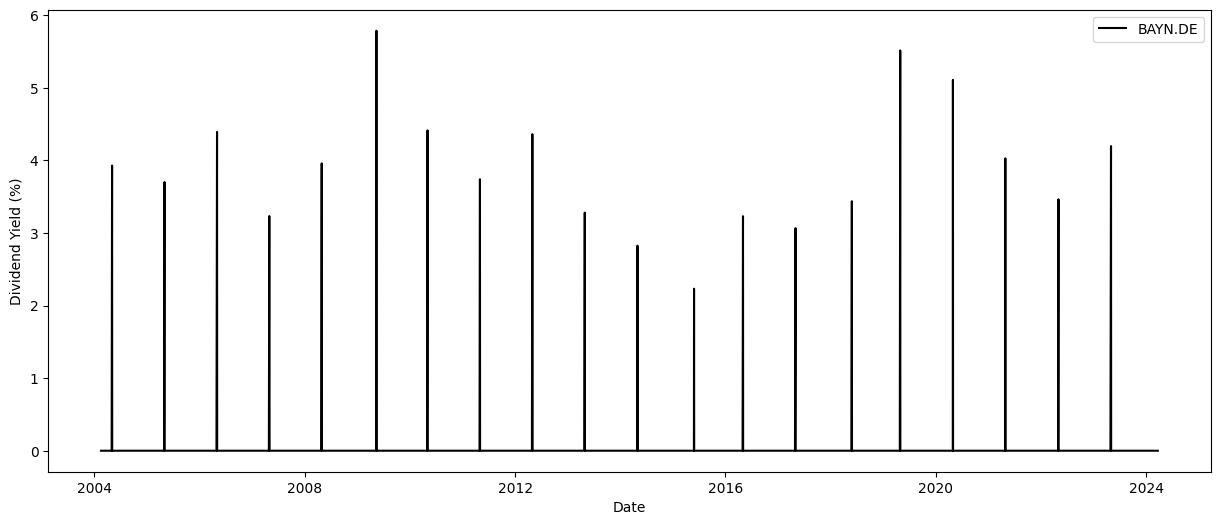

In [16]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate    0.441684
share_price      1.000000
Name: share_price, dtype: float64


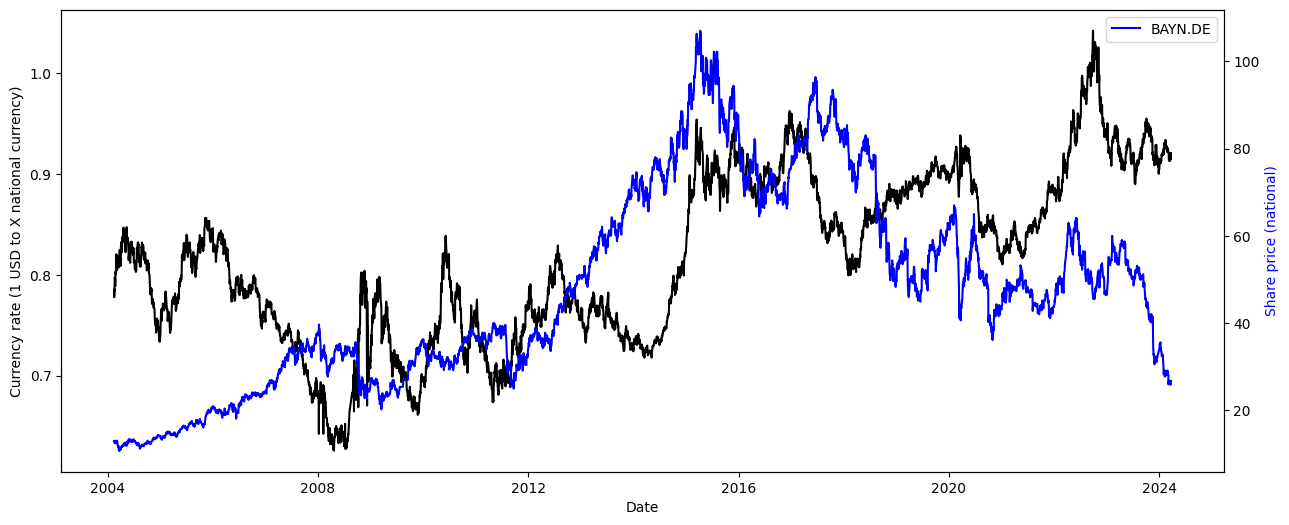

In [17]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

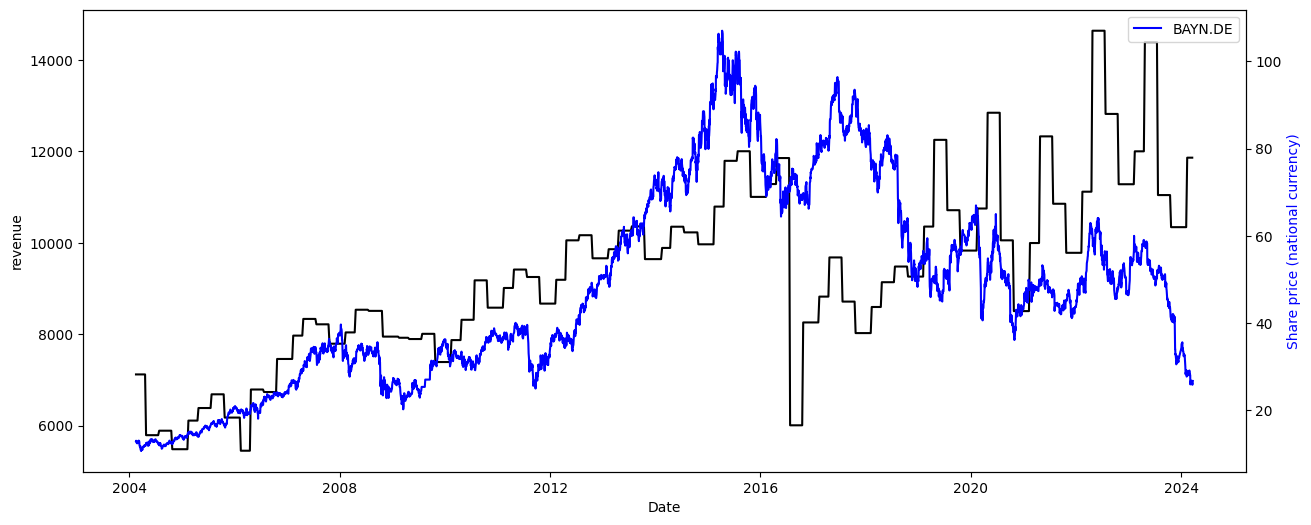

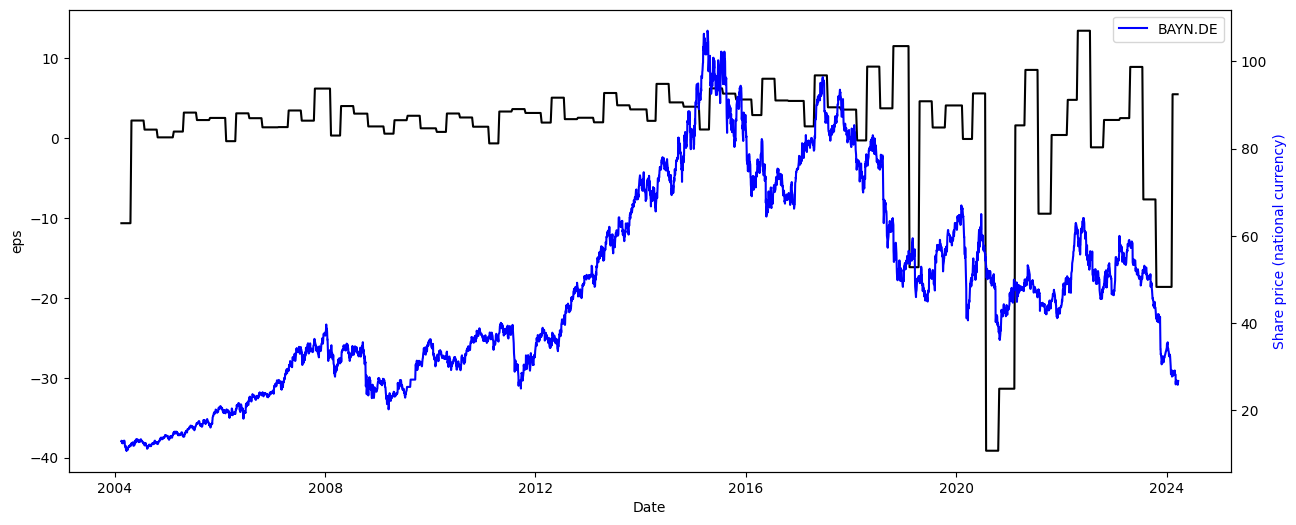

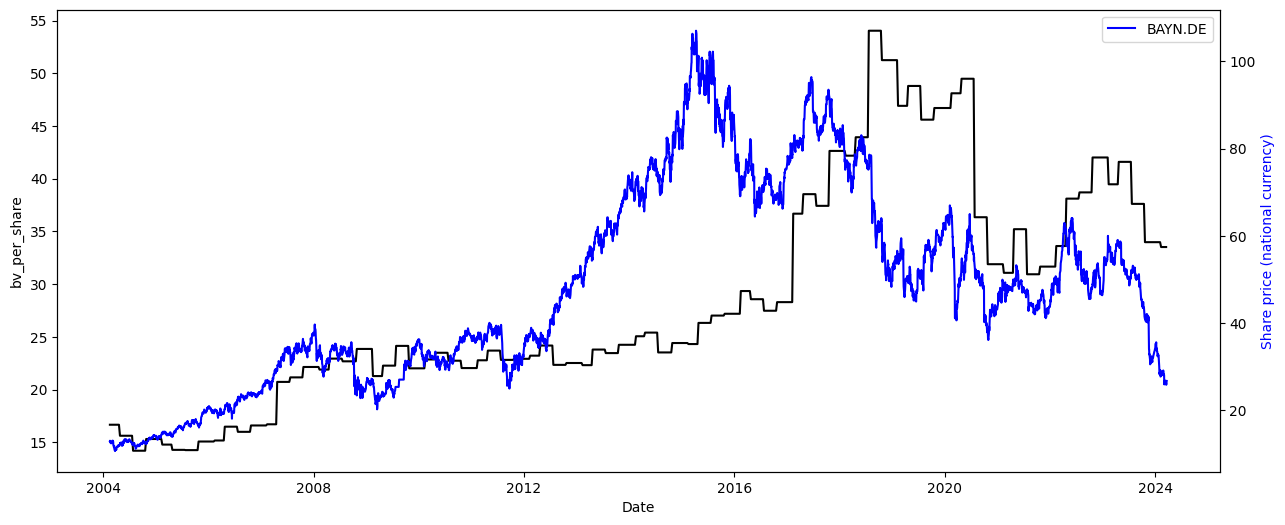

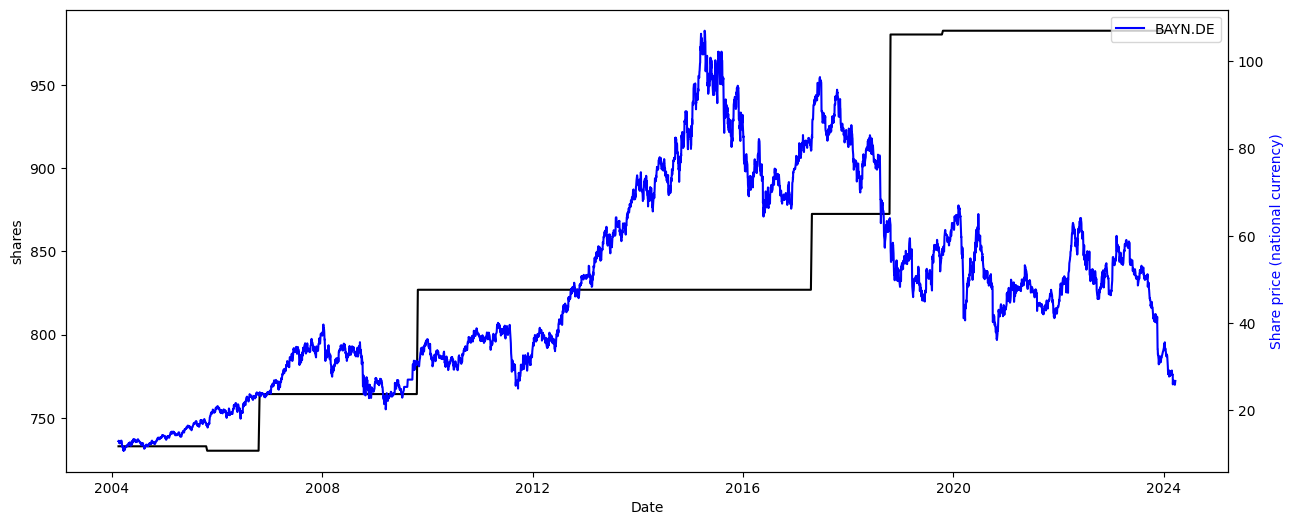

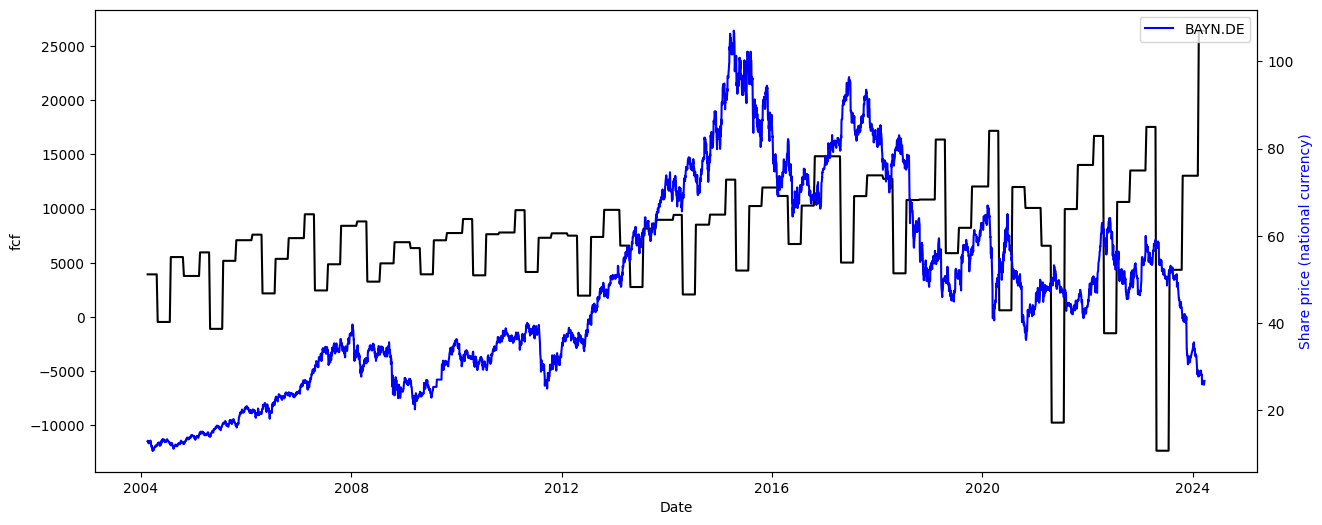

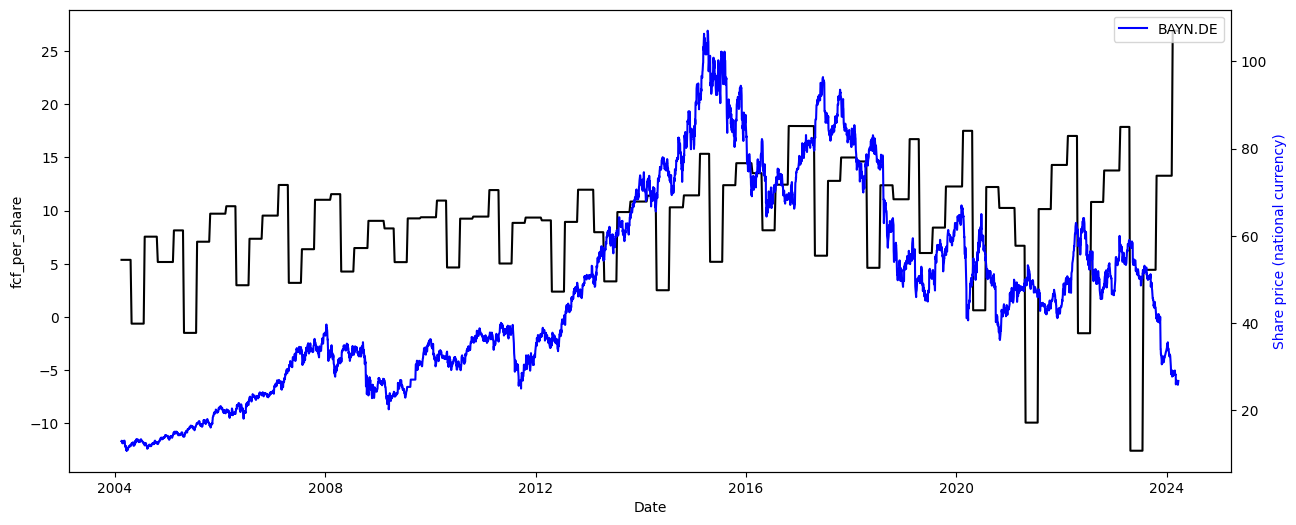

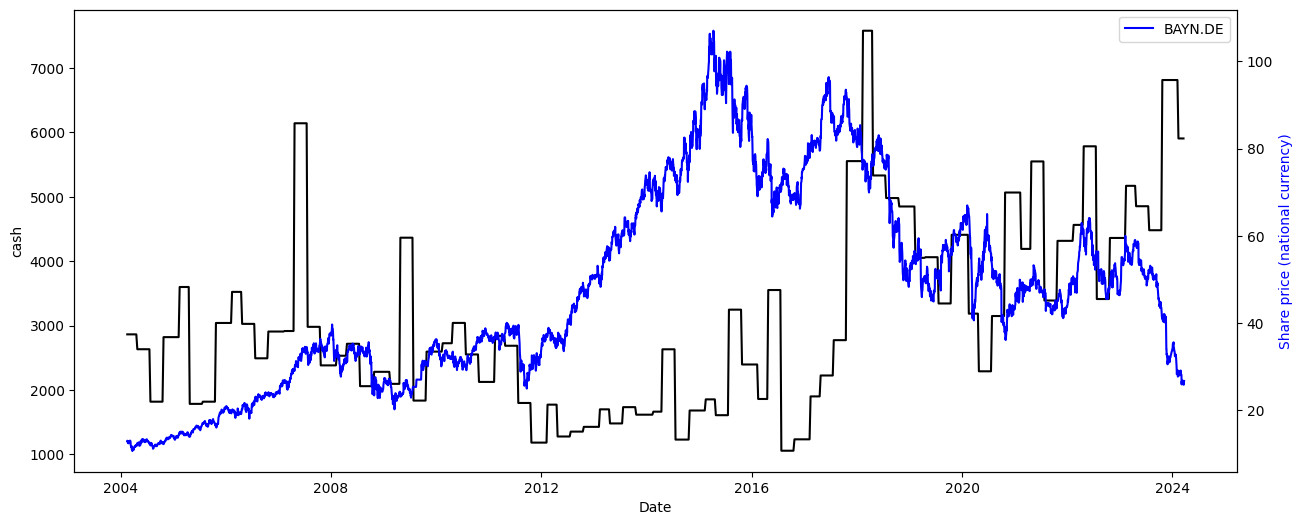

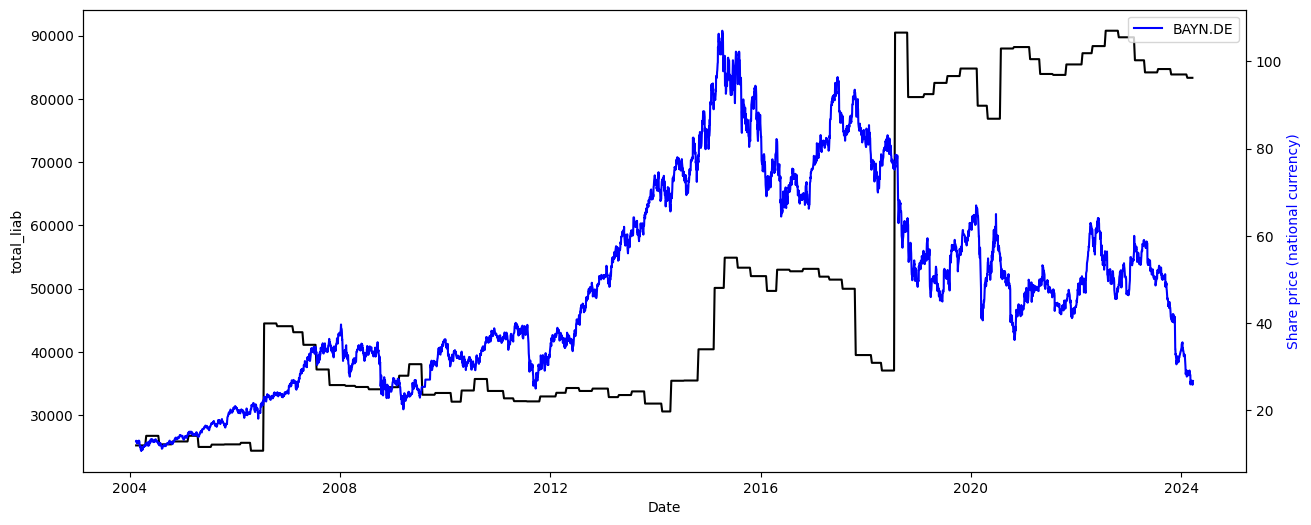

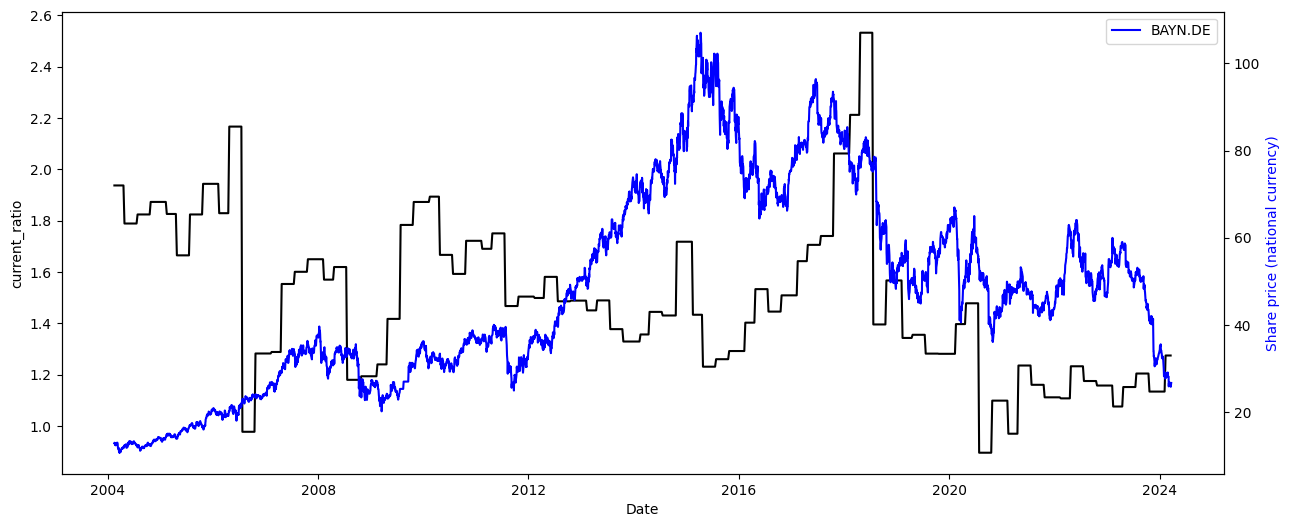

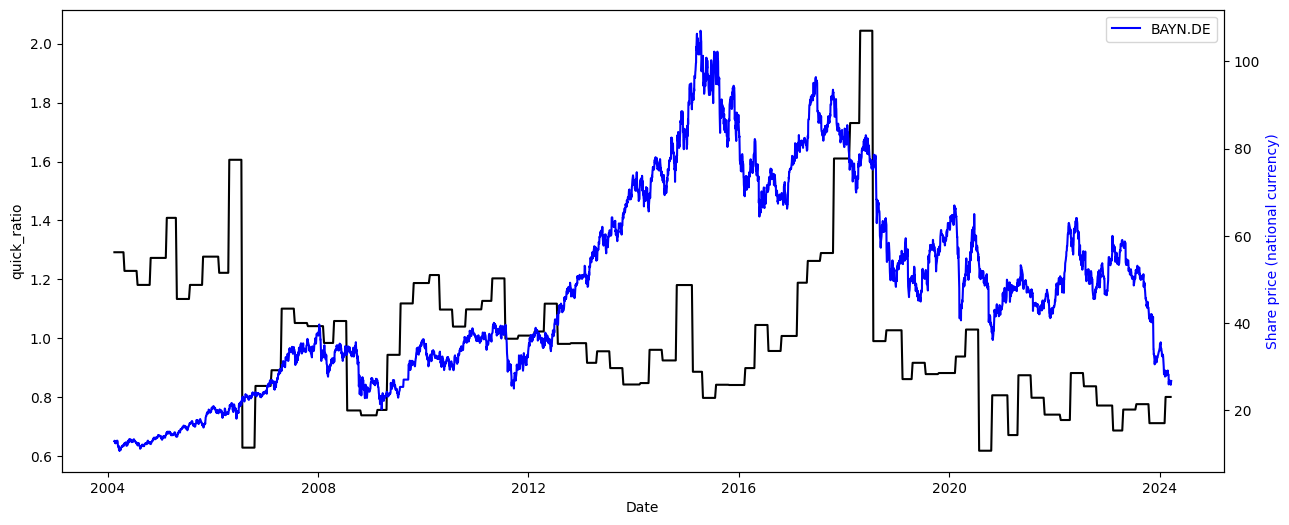

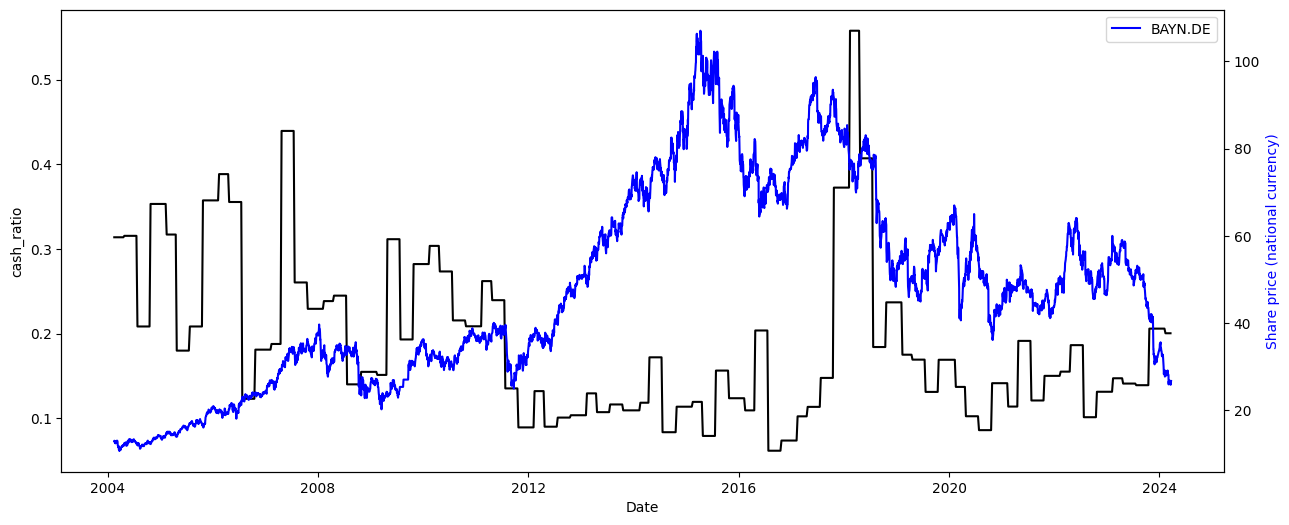

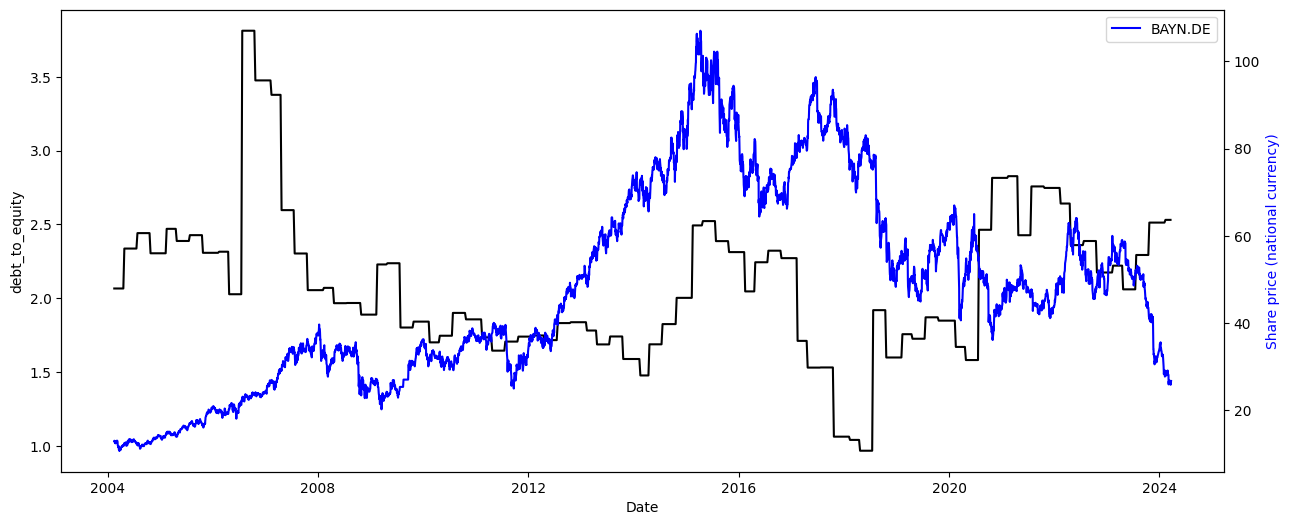

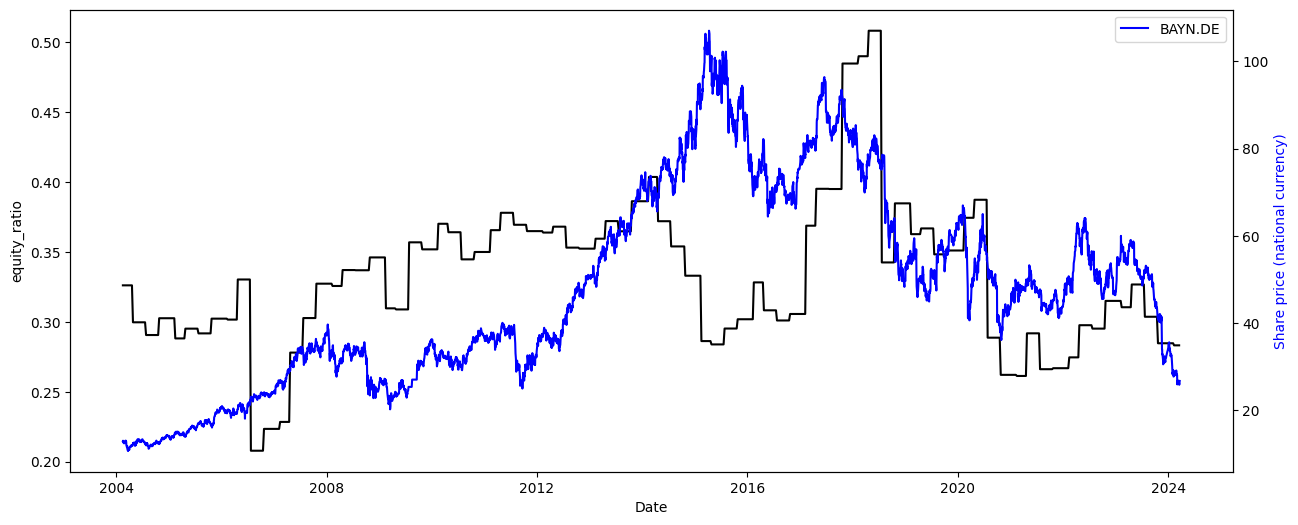

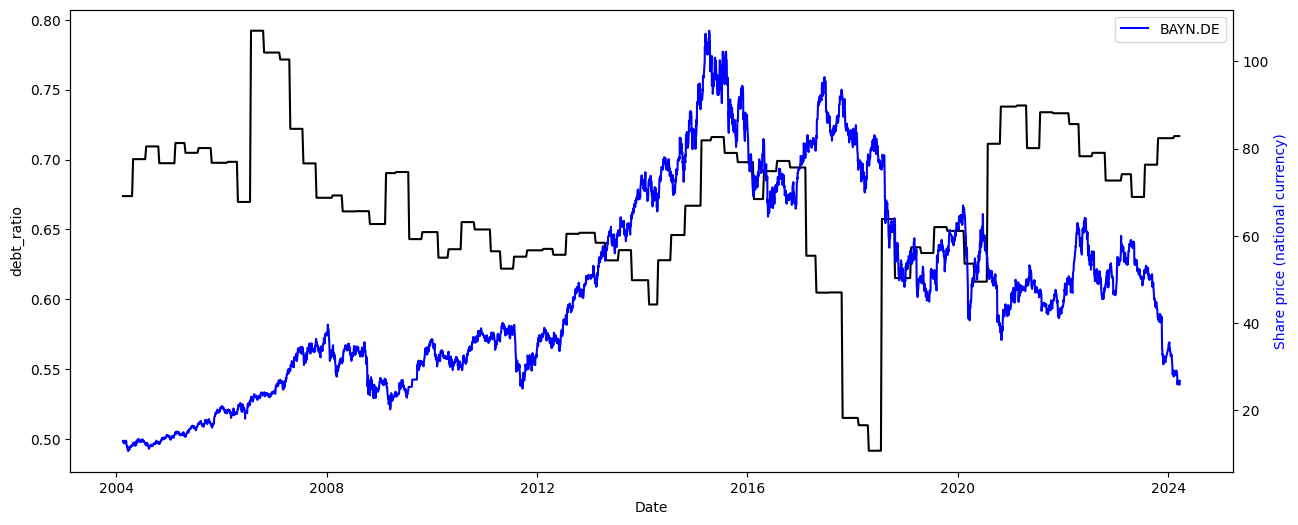

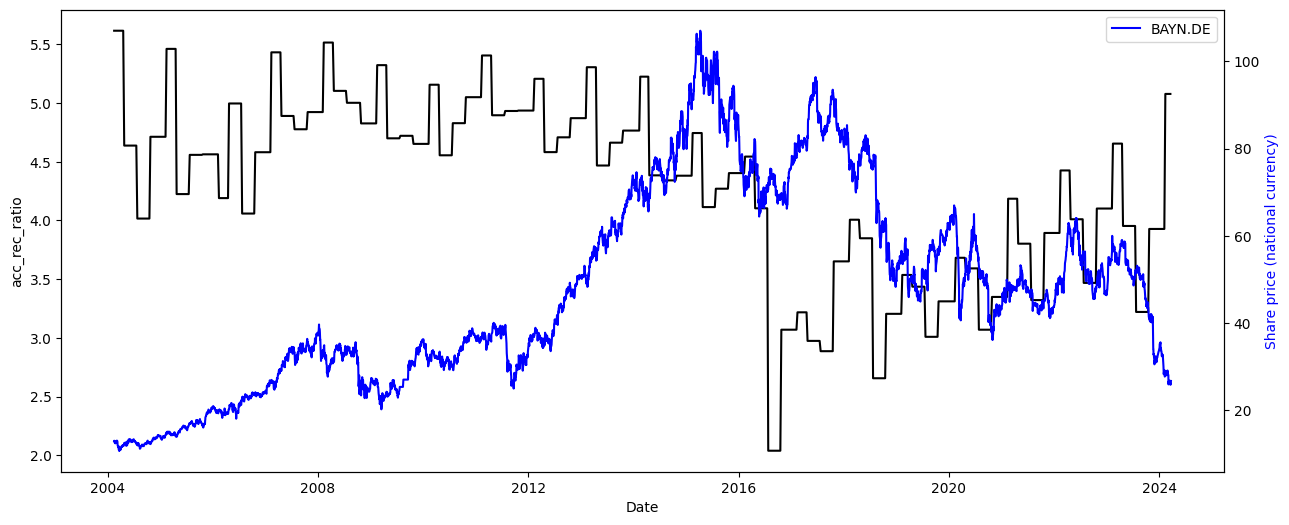

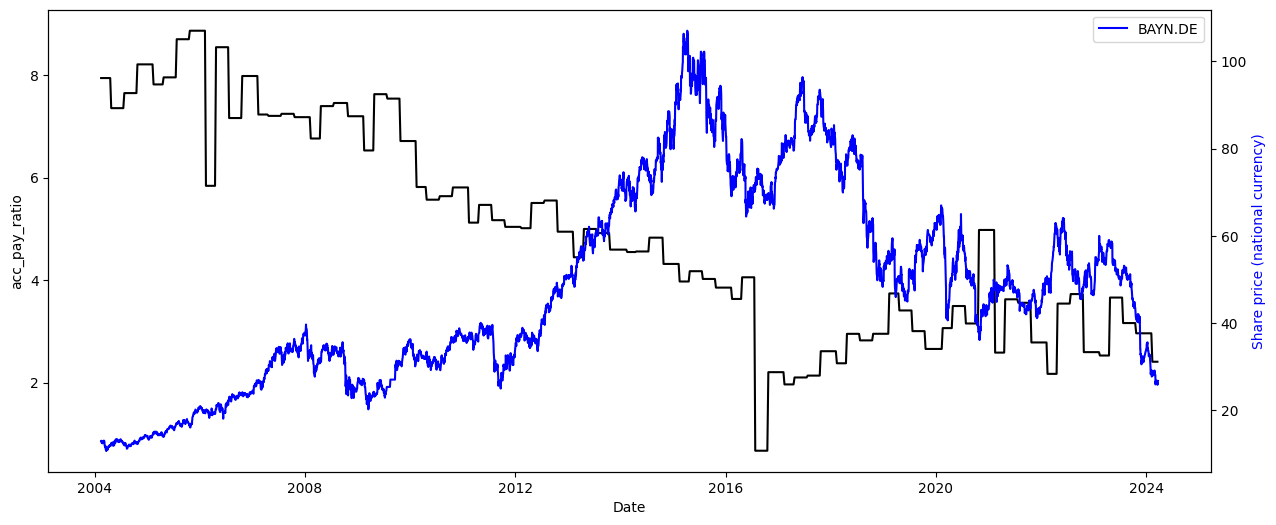

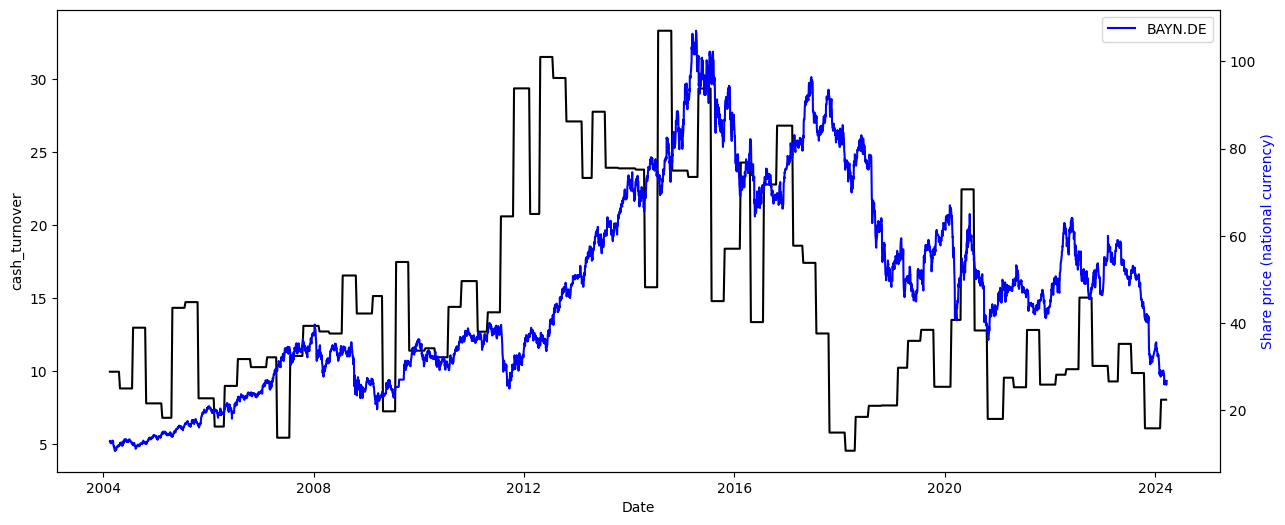

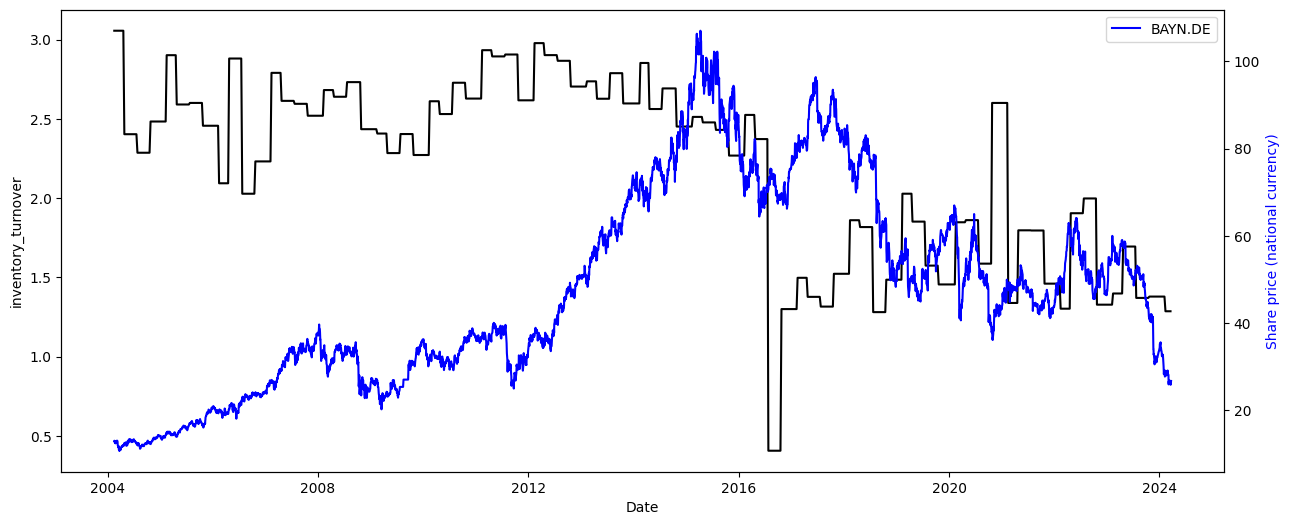

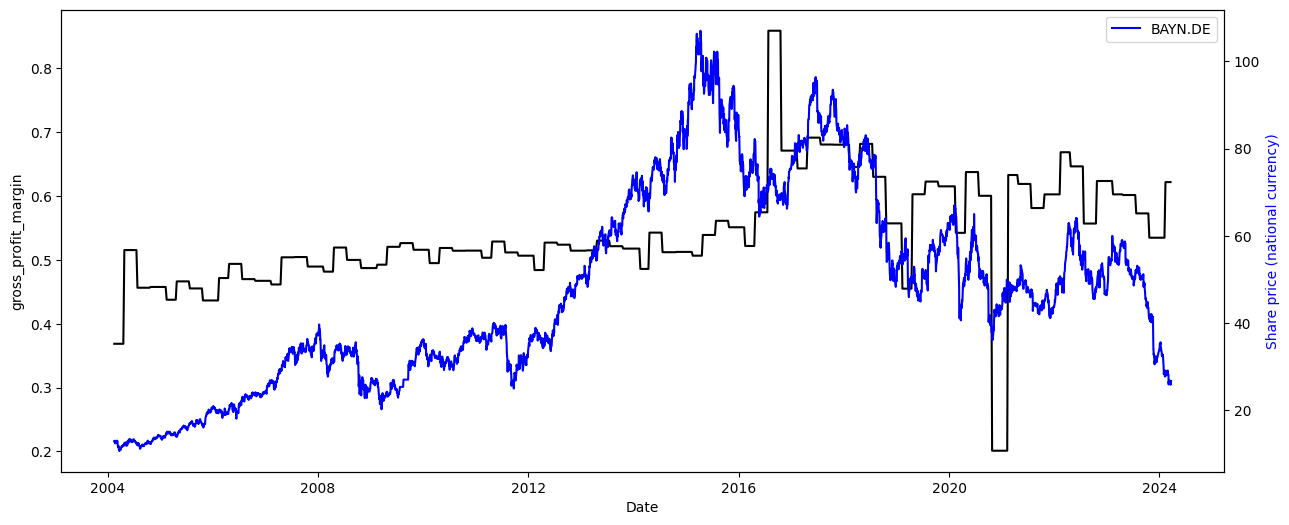

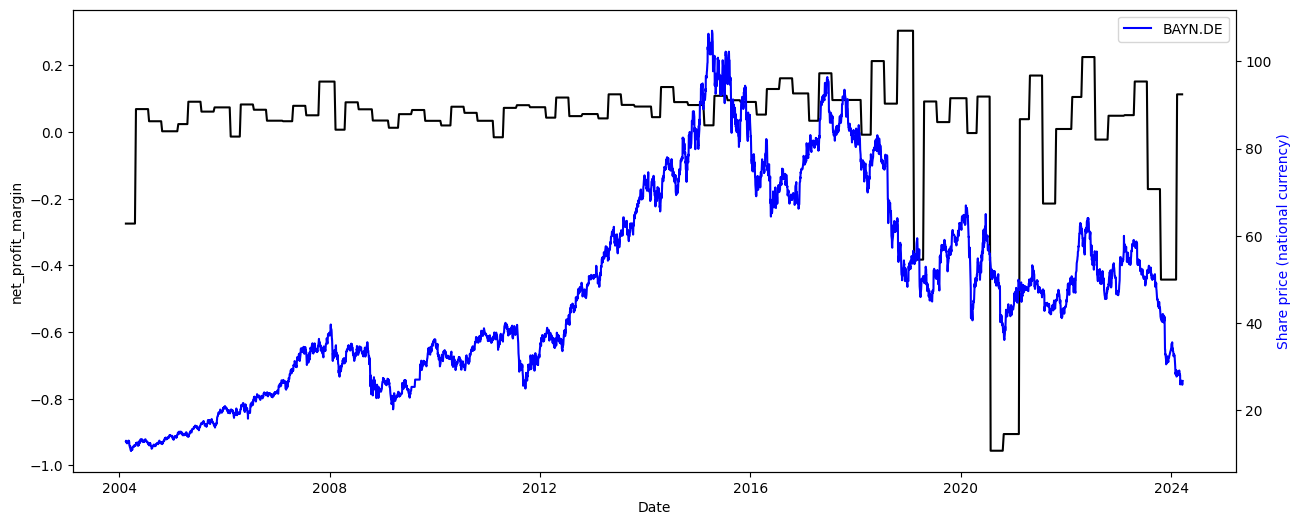

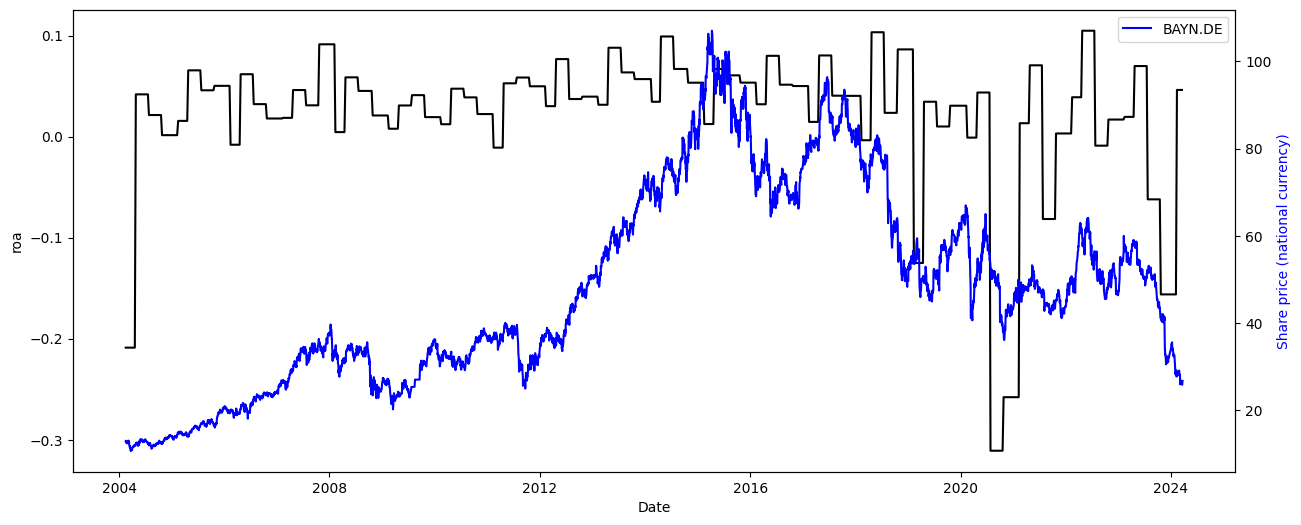

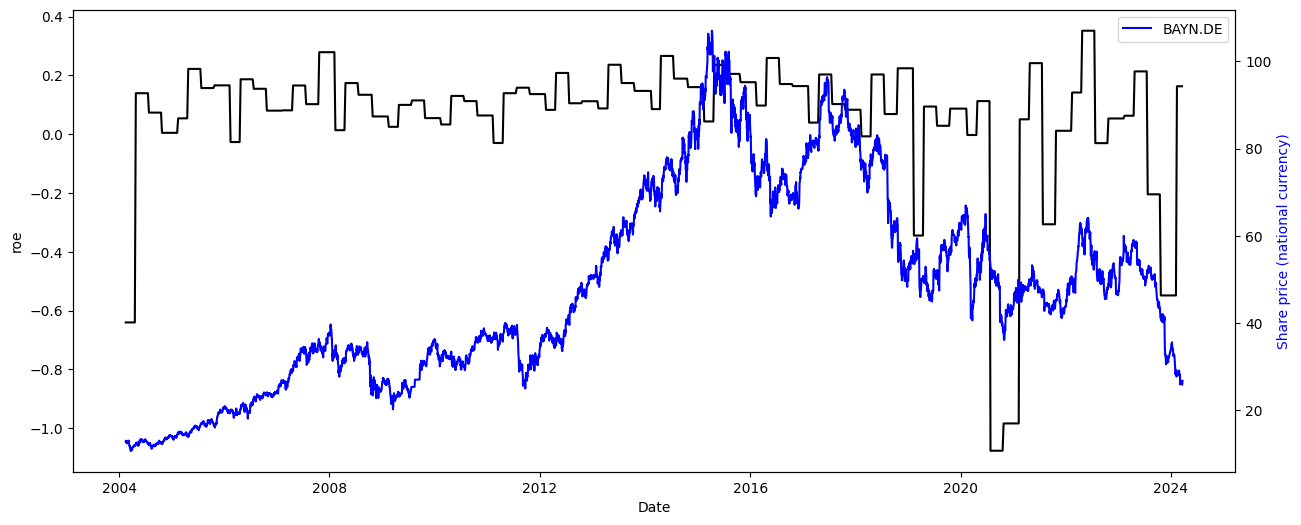

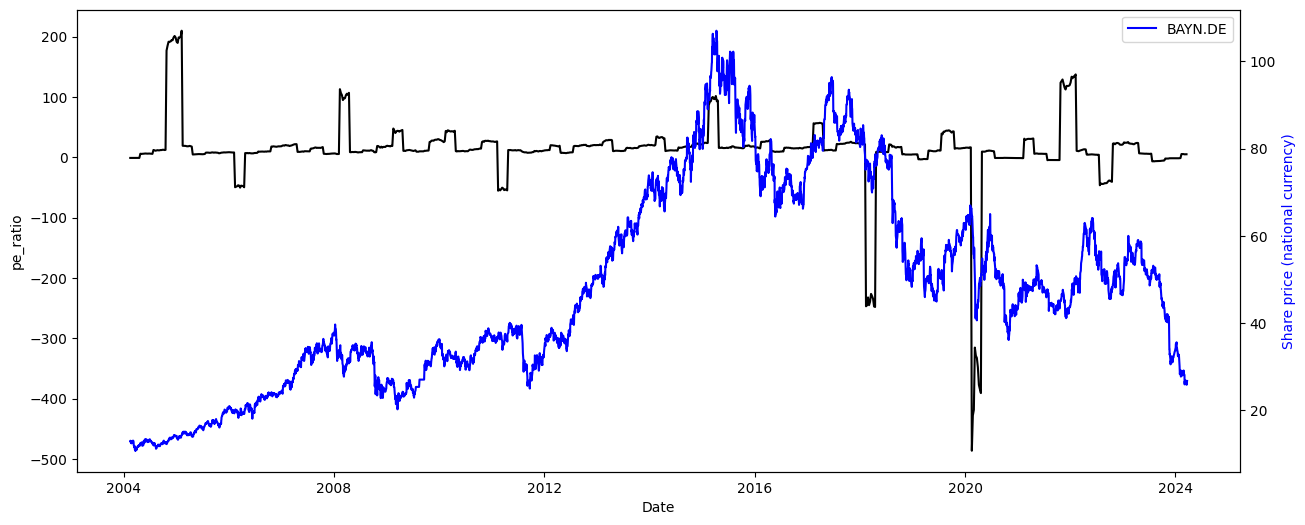

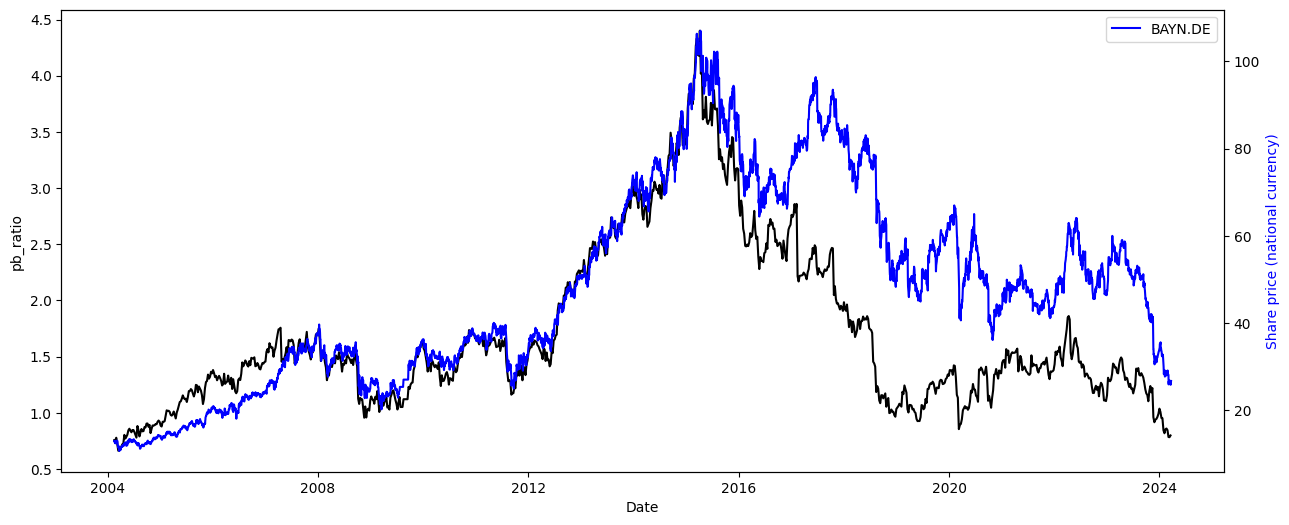

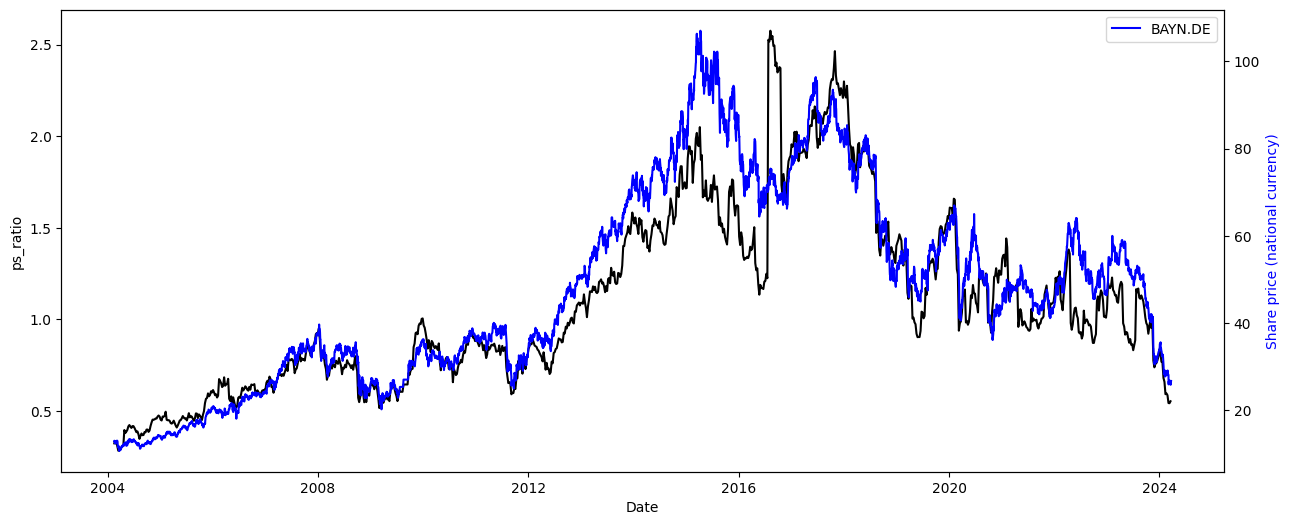

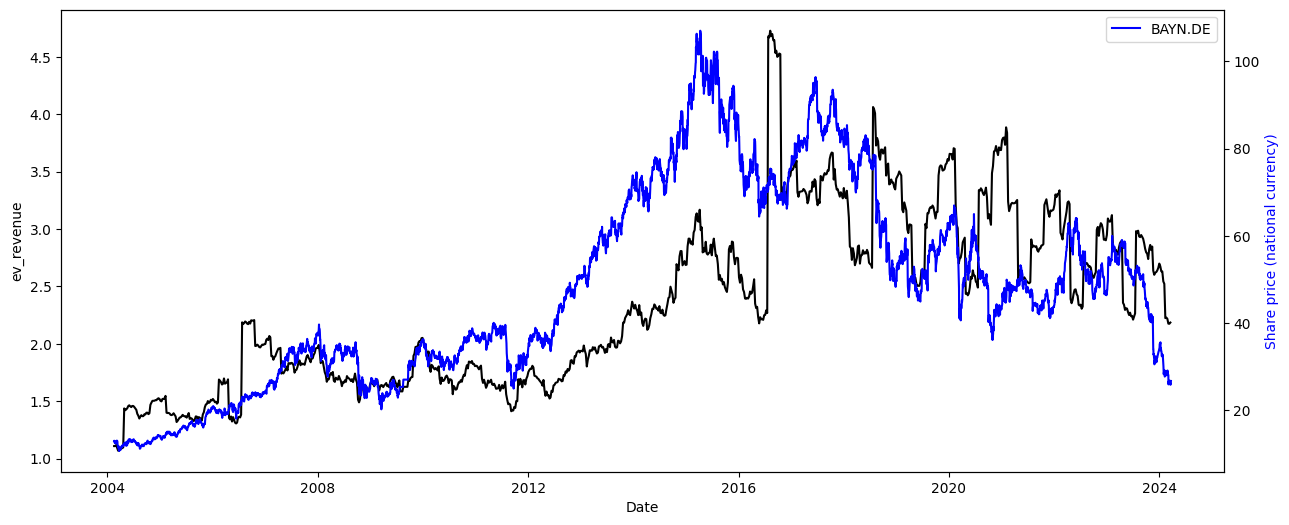

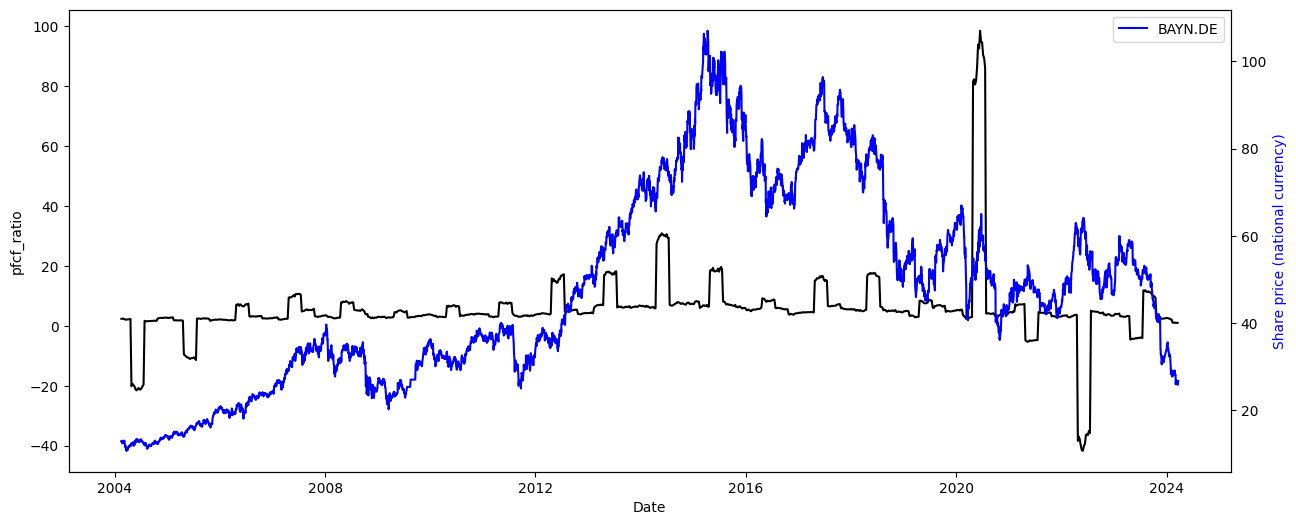

In [18]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

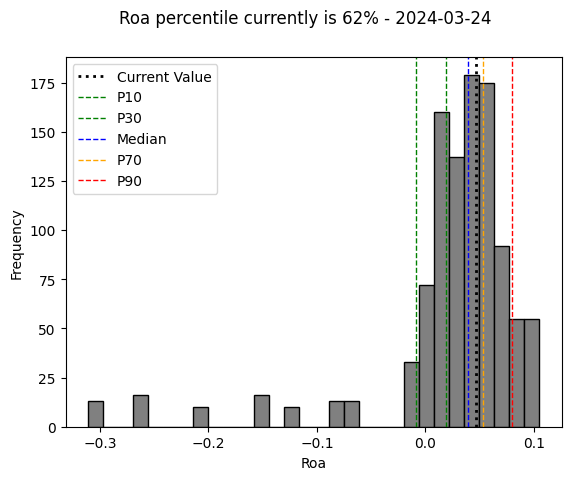

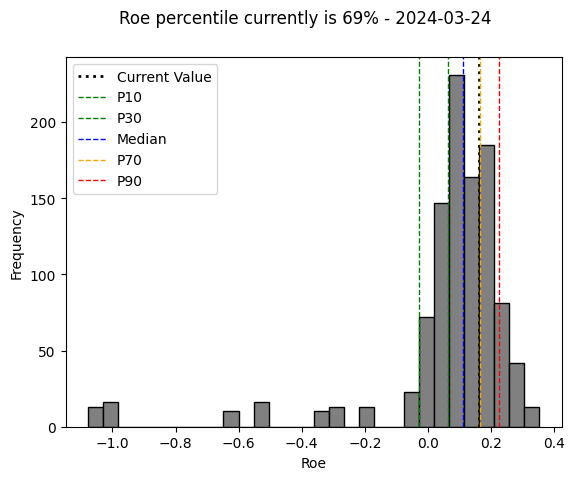

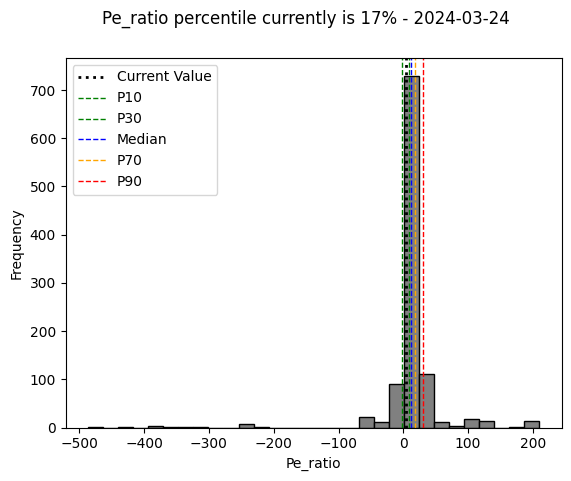

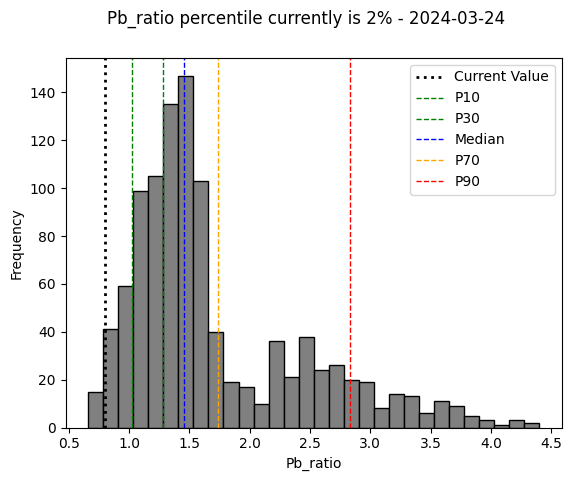

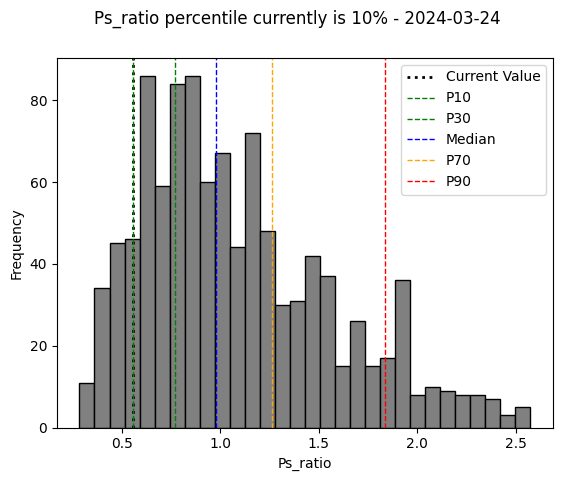

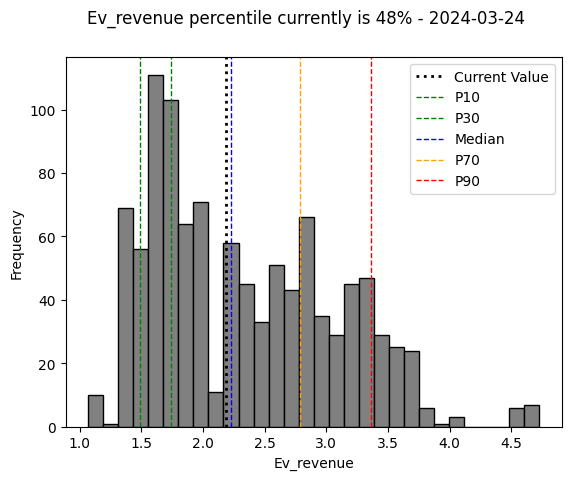

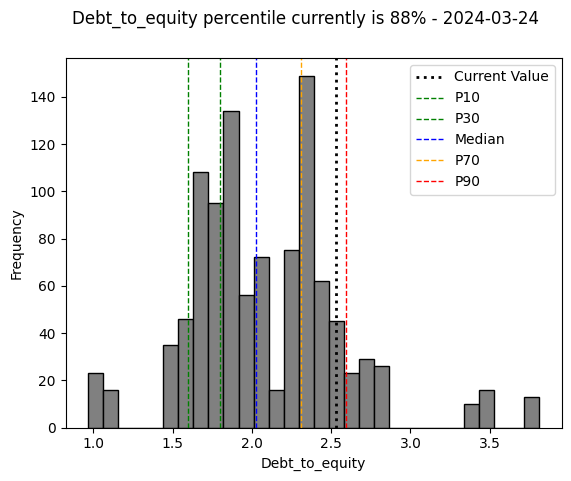

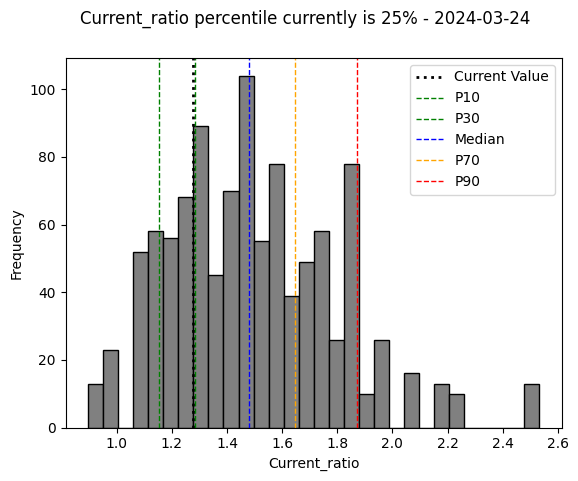

In [19]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[], owned_shares=owned_shares)

## Calculate correlation between value parameters

In [20]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,0.991843,0.073756,0.296468,0.117307,-0.204146,-0.280376,0.296729
roe,0.991843,1.000000,0.072323,0.277128,0.074989,-0.228239,-0.218890,0.269674
pe_ratio,0.073756,0.072323,1.000000,0.096039,-0.062117,-0.068194,0.181960,-0.048753
pb_ratio,0.296468,0.277128,0.096039,1.000000,0.675943,0.281829,-0.122254,-0.042419
ps_ratio,0.117307,0.074989,-0.062117,0.675943,1.000000,0.809429,-0.358822,0.004607
ev_revenue,-0.204146,-0.228239,-0.068194,0.281829,0.809429,1.000000,-0.012427,-0.343115
debt_to_equity,-0.280376,-0.218890,0.181960,-0.122254,-0.358822,-0.012427,1.000000,-0.511328
current_ratio,0.296729,0.269674,-0.048753,-0.042419,0.004607,-0.343115,-0.511328,1.000000


6 timestemos have been found!


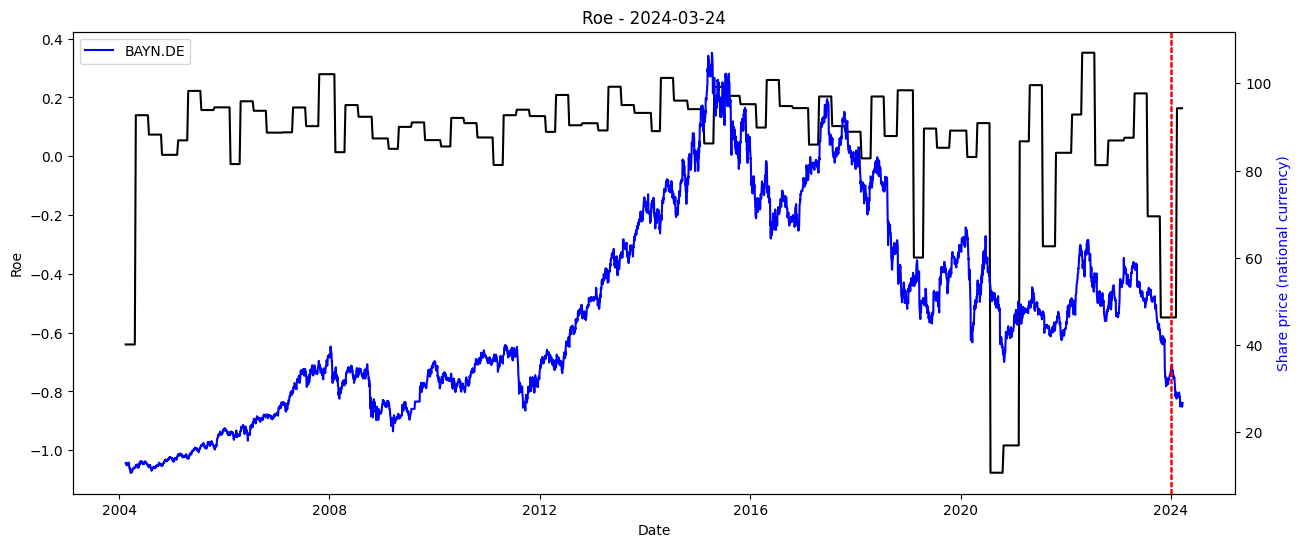

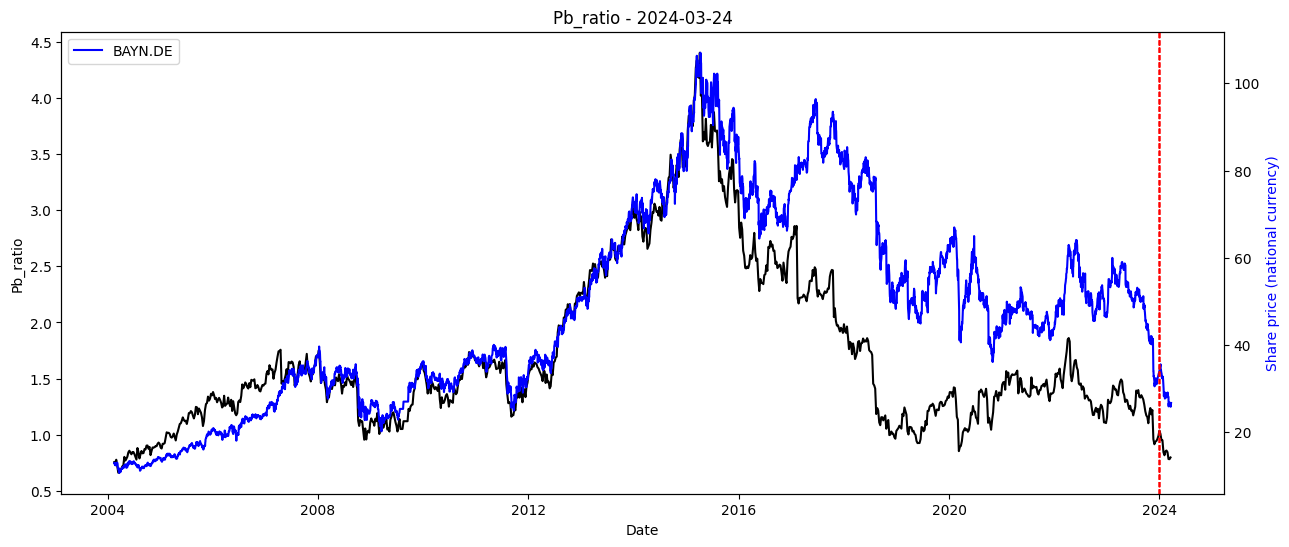

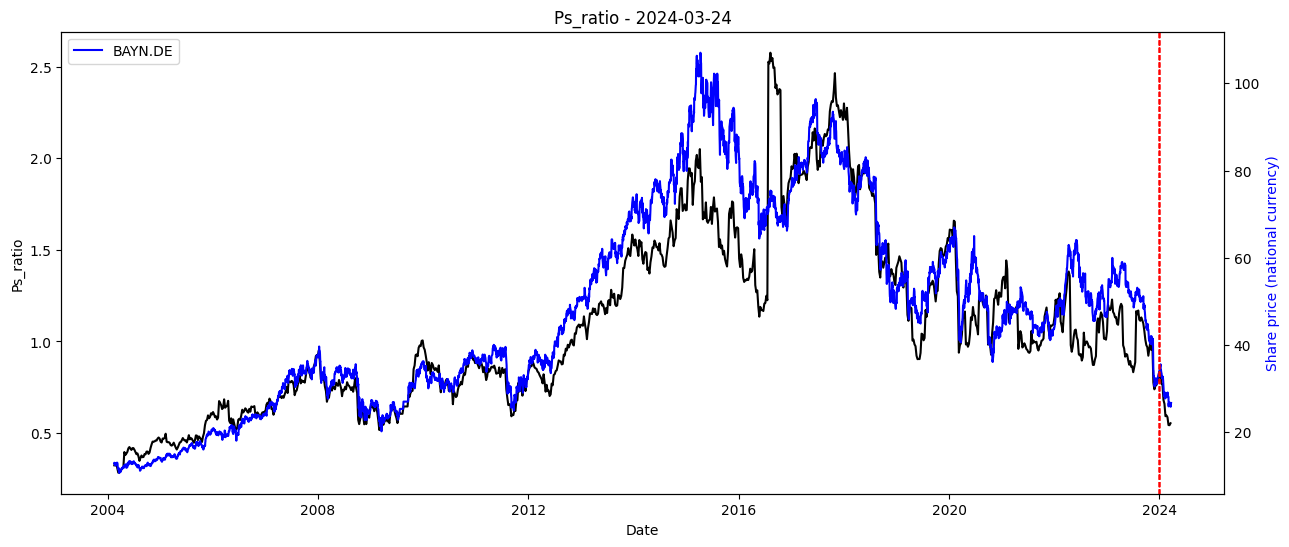

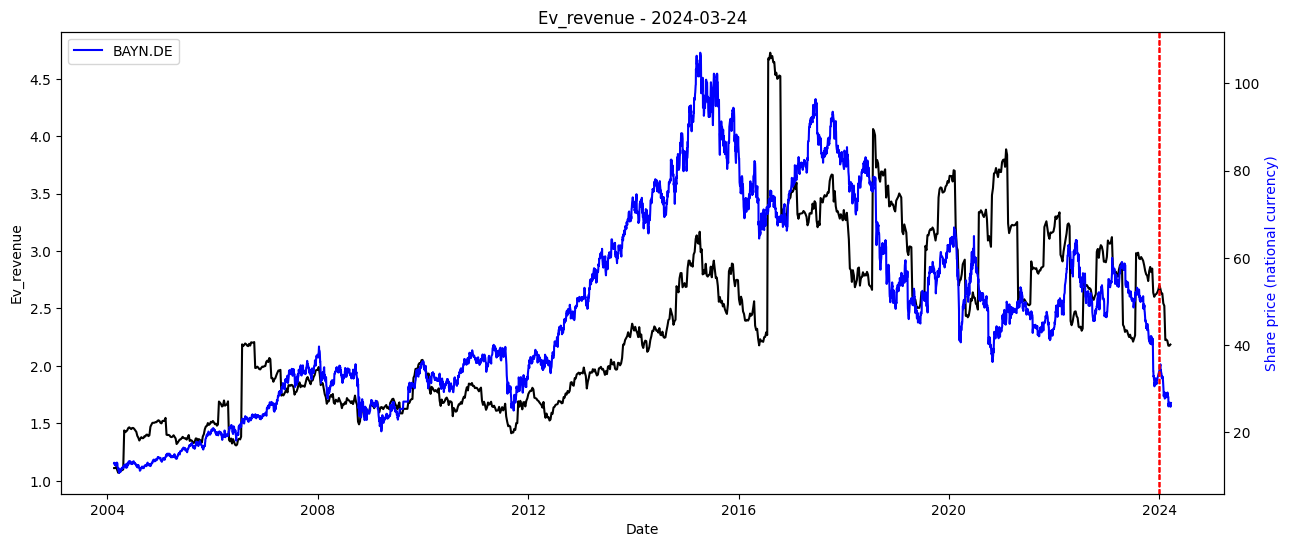

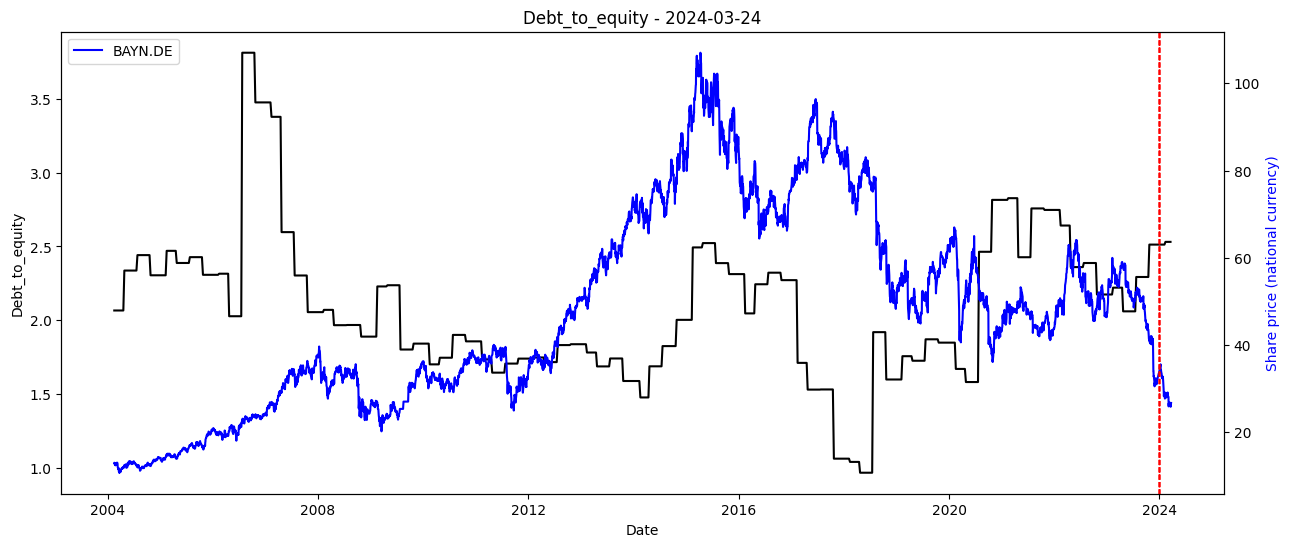

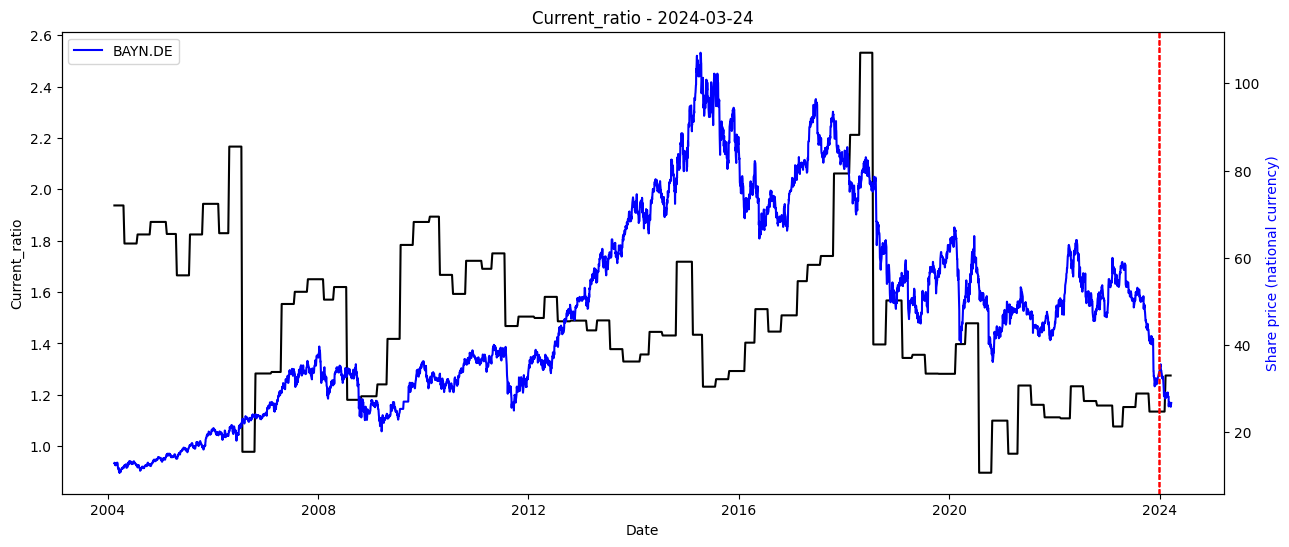

In [21]:
# plot value parameters in time and identify similar events
utils.get_historical_analouges(
    input_df=merged_nat_curr,
    ticker_all_price=ticker_all_price,
    share_name=share_name,
    tolerance=0.2,
    owned_shares=owned_shares
    )